In [1]:
# check version
from pycaret.utils import version
version()

'2.3.4'

In [2]:
import pandas as pd

In [3]:
# Import our input dataset
stats_df = pd.read_csv('stats_target_clean2.csv')
stats_df.head()

,Position,Season,Tm,Team_Name,Lg,G,W,L,W/L%,MOV,...,eFG%,TS%,TOV%,ORB%,FT/FGA,opp_eFG%,opp_TS%,opp_TOV%,opp_ORB%,opp_FT/FGA
0,0,2020-21,WAS,Washington Wizards,NBA,72,34,38,0.472,-1.83,...,0.531,0.569,12.3,21.3,0.221,0.539,0.576,12.5,22.4,0.217
1,0,2020-21,UTA,Utah Jazz,NBA,72,52,20,0.722,9.25,...,0.563,0.597,12.7,24.5,0.195,0.507,0.537,10.3,20.7,0.159
2,0,2020-21,TOR,Toronto Raptors,NBA,72,27,45,0.375,-0.47,...,0.529,0.567,11.9,20.8,0.196,0.543,0.584,14.4,23.7,0.234
3,0,2020-21,SAS,San Antonio Spurs,NBA,72,33,39,0.458,-1.74,...,0.517,0.554,10.2,20.0,0.192,0.541,0.570,11.8,22.7,0.174
4,0,2020-21,SAC,Sacramento Kings,NBA,72,31,41,0.431,-3.68,...,0.549,0.578,12.0,21.3,0.185,0.557,0.591,12.1,25.0,0.199


In [4]:
# Pull out Season, TM and Team_Name into DF
name_df = stats_df[['Season', 'Tm', 'Team_Name']]
name_df.head()

,Season,Tm,Team_Name
0,2020-21,WAS,Washington Wizards
1,2020-21,UTA,Utah Jazz
2,2020-21,TOR,Toronto Raptors
3,2020-21,SAS,San Antonio Spurs
4,2020-21,SAC,Sacramento Kings


In [5]:
# Drop LG, Season, TM, Team_Name, G, W, L columns
stats_df.drop(['Lg','Season','Tm', 'Team_Name', 'G', 'W', 'L'], axis=1, inplace=True)

In [29]:
stats = stats_df

In [30]:
# Import our input dataset
cy_df = pd.read_csv('cy_stats.csv')
cy_df.head()

,Position,Season,Tm,Lg,G,W,L,W/L%,MOV,SOS,...,eFG%,TS%,TOV%,ORB%,FT/FGA,opp_eFG%,opp_TS%,opp_TOV%,opp_ORB%,opp_FT/FGA
0,0,2021-22,MIA,NBA,6,5,1,0.833,17.00,1.07,...,0.525,0.565,13.6,27.5,0.197,0.464,0.501,13.4,15.9,0.181
1,0,2021-22,WAS,NBA,7,5,2,0.714,2.57,1.11,...,0.505,0.549,11.5,20.4,0.213,0.492,0.535,11.0,20.5,0.197
2,0,2021-22,UTA,NBA,6,5,1,0.833,12.83,-3.08,...,0.526,0.574,14.2,24.6,0.236,0.450,0.485,10.8,23.1,0.164
3,0,2021-22,TOR,NBA,8,5,3,0.625,4.63,1.25,...,0.487,0.518,12.1,29.8,0.158,0.521,0.554,16.8,20.6,0.178
4,0,2021-22,SAS,NBA,7,2,5,0.286,-0.43,-1.50,...,0.526,0.542,12.2,22.2,0.113,0.549,0.568,15.2,21.4,0.130


In [32]:
# Pull out Season, TM and Team_Name into DF
cy_name_df = cy_df[['Season', 'Tm']]
cy_name_df.head()

,Season,Tm
0,2021-22,MIA
1,2021-22,WAS
2,2021-22,UTA
3,2021-22,TOR
4,2021-22,SAS


In [33]:
# Drop LG, Season, TM, Team_Name, G, W, L columns
cy_df.drop(['Lg','Season','Tm', 'G', 'W', 'L'], axis=1, inplace=True)

In [35]:
data_unseen = cy_df

In [36]:
from pycaret.classification import *
clf1 = setup(stats, target = 'Position', session_id=123, log_experiment=True, experiment_name='stats1')

,Description,Value
0,session_id,123
1,Target,Position
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(933, 18)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9663,0.9414,0.1167,0.2500,0.1567,0.1504,0.1633,0.0470
ridge,Ridge Classifier,0.9648,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0030
et,Extra Trees Classifier,0.9648,0.9181,0.1000,0.1500,0.1167,0.1121,0.1159,0.0330
lr,Logistic Regression,0.9633,0.9331,0.1500,0.1833,0.1567,0.1498,0.1544,0.4450
svm,SVM - Linear Kernel,0.9633,0.0000,0.0500,0.0333,0.0400,0.0377,0.0385,0.0030
knn,K Neighbors Classifier,0.9618,0.7909,0.0000,0.0000,0.0000,-0.0044,-0.0049,0.1920
lightgbm,Light Gradient Boosting Machine,0.9617,0.9085,0.1167,0.1833,0.1333,0.1232,0.1310,0.0140
qda,Quadratic Discriminant Analysis,0.9587,0.7024,0.1500,0.2500,0.1833,0.1696,0.1774,0.0030
lda,Linear Discriminant Analysis,0.9587,0.8929,0.0000,0.0000,0.0000,-0.0076,-0.0081,0.0040
gbc,Gradient Boosting Classifier,0.9556,0.8811,0.1167,0.1667,0.1233,0.1097,0.1184,0.0250


In [38]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [39]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9697,0.9788,0.3333,1.0000,0.5000,0.4884,0.5684
1,0.9545,0.9048,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9545,0.9630,0.3333,0.5000,0.4000,0.3774,0.3858
3,0.9692,0.9841,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9846,0.9683,0.5000,1.0000,0.6667,0.6597,0.7016
5,0.9692,0.9524,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9692,0.9286,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9538,0.9444,0.0000,0.0000,0.0000,-0.0209,-0.0223
8,0.9692,0.8373,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9692,0.9524,0.0000,0.0000,0.0000,0.0000,0.0000


In [40]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9545,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9545,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9545,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9692,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9692,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9692,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9692,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9692,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9692,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9692,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


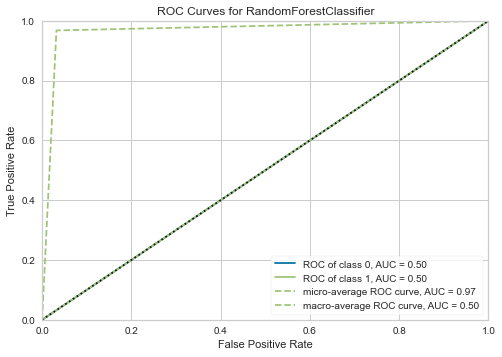

In [41]:
plot_model(tuned_rf, plot = 'auc')

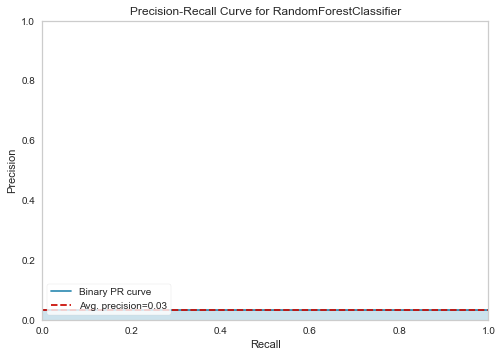

In [42]:
plot_model(tuned_rf, plot = 'pr')

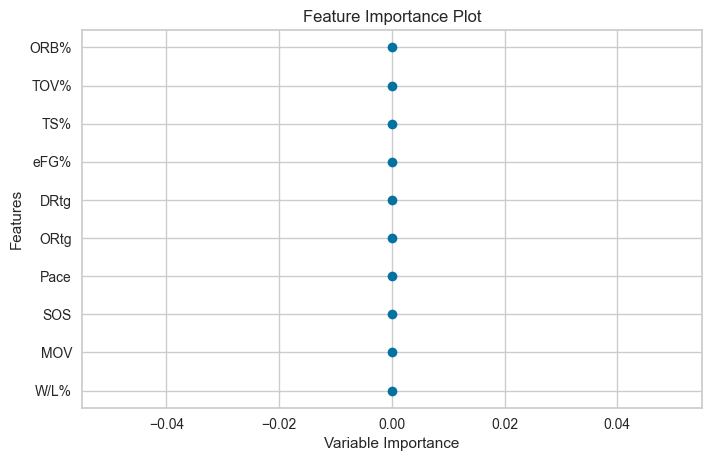

In [43]:
plot_model(tuned_rf, plot='feature')

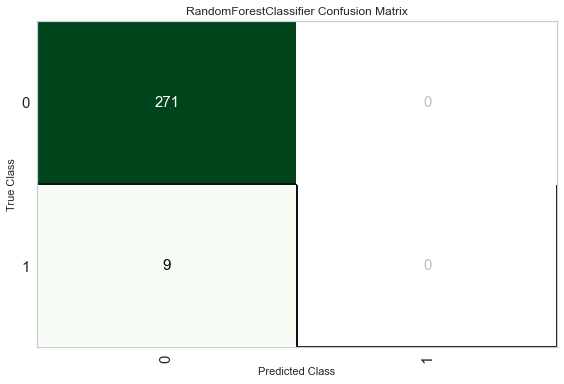

In [44]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [45]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [46]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9679,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [47]:
final_rf = finalize_model(tuned_rf)

In [48]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=3, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [49]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9679,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [50]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Position,W/L%,MOV,SOS,SRS,Pace,ORtg,DRtg,eFG%,TS%,TOV%,ORB%,FT/FGA,opp_eFG%,opp_TS%,opp_TOV%,opp_ORB%,opp_FT/FGA,Label,Score
0,0,0.833,17.00,1.07,18.07,99.9,112.2,95.5,0.525,0.565,13.6,27.5,0.197,0.464,0.501,13.4,15.9,0.181,0,0.9657
1,0,0.714,2.57,1.11,3.68,99.0,108.8,106.3,0.505,0.549,11.5,20.4,0.213,0.492,0.535,11.0,20.5,0.197,0,0.9657
2,0,0.833,12.83,-3.08,9.76,99.3,111.9,99.0,0.526,0.574,14.2,24.6,0.236,0.450,0.485,10.8,23.1,0.164,0,0.9657
3,0,0.625,4.63,1.25,5.88,97.6,107.4,102.7,0.487,0.518,12.1,29.8,0.158,0.521,0.554,16.8,20.6,0.178,0,0.9657
4,0,0.286,-0.43,-1.50,-1.93,101.7,106.6,107.0,0.526,0.542,12.2,22.2,0.113,0.549,0.568,15.2,21.4,0.130,0,0.9657


In [53]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Position'], unseen_predictions['Position'], metric = 'Accuracy')

1.0